In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

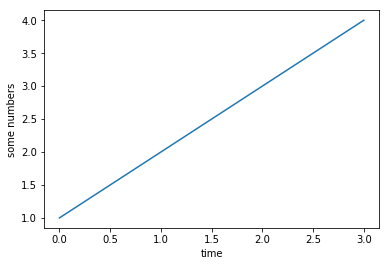

In [2]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.xlabel('time')
plt.show()

In [3]:
np.random.seed(123)

In [4]:
from __future__ import print_function
import keras

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


In [5]:
def makeModelML(img_x, img_y, num_classes):
    input_shape = (img_x, img_y, 1)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

In [6]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))


def runML(img_x, img_y, num_classes, batch_size, epochs, itrain, ltrain, itest, ltest):
    history = AccuracyHistory()
    model = makeModelML(img_x,img_y,num_classes)
    model.fit(itrain, ltrain,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(itest, ltest),
          callbacks=[history])
    score = model.evaluate(itest, ltest, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return model, history, score

In [7]:
from keras.datasets import mnist
#
#  Generate the labeled data
#
ix = 28
iy = 28
nc = 10
batch_size = 128
epochs = 10
# Get the data source as labeled pairs for train and test
(itro, ltro), (iteo, lteo) = mnist.load_data()

def convertML(img_x, img_y, num_classes, img_train_orig, label_train_orig, img_test_orig, label_test_orig):
    # reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
    # because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
    img_train = img_train_orig.reshape(img_train_orig.shape[0], img_x, img_y, 1)
    img_test = img_test_orig.reshape(img_test_orig.shape[0], img_x, img_y, 1)
    # convert the data to the right type
    img_train = img_train.astype('float32')
    img_test = img_test.astype('float32')
    img_train /= 255
    img_test /= 255
    label_train = keras.utils.to_categorical(label_train_orig, num_classes)
    label_test = keras.utils.to_categorical(label_test_orig, num_classes)
    return img_train, label_train, img_test, label_test

# Convert the data to be an input for runML
itr, ltr, ite, lte = convertML(ix, iy, nc, itro, ltro, iteo, lteo)
# Execute runML
model, history, score = runML(ix, iy, nc, batch_size, epochs, itr, ltr, ite, lte)

11493376/11490434 [==============================] - 1s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.1497 - acc: 0.9549 - val_loss: 0.0500 - val_acc: 0.9851
Epoch 2/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0414 - acc: 0.9873 - val_loss: 0.0297 - val_acc: 0.9895
Epoch 3/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0308 - val_acc: 0.9898
Epoch 4/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0198 - acc: 0.9939 - val_loss: 0.0242 - val_acc: 0.9921
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0146 - acc: 0.9952 - val_loss: 0.0319 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 

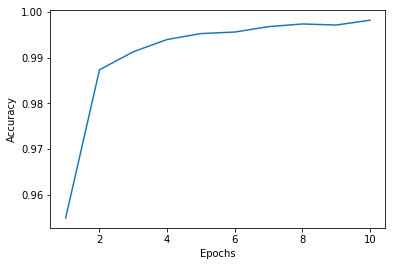

In [8]:
# Plot the results
plt.plot(range(1, epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

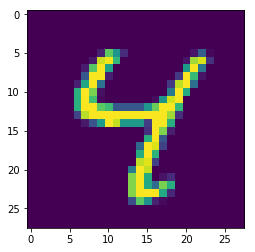

In [9]:
plt.imshow(iteo[6])

In [10]:
prediction = model.predict(np.array(ite[6:7]))
print("predict: %s" % np.argmax(prediction))

predict: 4


In [ ]:
f, xarr = plt.subplots(1,len(itro))
for i in range(0,len(itro)):
    xarr[i].imshow(itro[i])
    xarr[i].set_xlabel(ltro[i])

In [ ]:
f, xarr = plt.subplots(1,len(iteo))
for i in range(0,len(iteo)):
    xarr[i].imshow(iteo[i])
    xarr[i].set_xlabel(lteo[i])